In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Logistic Regression

In [3]:
df = pd.read_csv('imbd_cleaned.csv')

In [4]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,...,"Documentary,Short",0.693147,1.386294,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",2.302585,0.0,0.693147,['silent'],0.0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,...,"Animation,Short",0.000000,0.000000,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",1.386294,0.0,0.693147,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,...,Short,0.000000,0.693147,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",1.609438,0.0,0.693147,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,...,"Documentary,Short",0.693147,1.945910,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",1.945910,0.0,0.693147,['silent'],0.0
4,Autour d'une cabine,"(6, 7]",1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,...,"Animation,Short",0.000000,0.000000,6.1,"['\\N', 'ES', 'US', 'FR', 'HU', 'RU', 'UA']",1.386294,0.0,0.693147,['silent'],0.0


In [5]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.drop(['averageRating'], axis=1)
numeric_df.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,externalLinks,writerCredits,directorsCredits,quotesTotal
0,1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,0.0,0,0,7,2.833213,0.693147,1.386294,2.302585,0.0,0.693147,0.0
1,1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,0.0,0,0,6,0.693147,0.000000,0.000000,1.386294,0.0,0.693147,0.0
2,1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,0.0,0,0,5,0.000000,0.000000,0.693147,1.609438,0.0,0.693147,0.0
3,1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,0.0,0,0,6,3.044522,0.693147,1.945910,1.945910,0.0,0.693147,0.0
4,1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,0.0,0,0,6,2.197225,0.000000,0.000000,1.386294,0.0,0.693147,0.0


In [6]:
x = numeric_df.values
y = df['rating']

# Data Partitioning

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=100)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [12]:
cv = StratifiedKFold()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = LogisticRegression(random_state=0, max_iter=100, solver='saga', penalty=None)
grid_search = GridSearchCV(clf,
    param_grid, 
    cv=StratifiedKFold(),
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(penalty=None, random_state=0,
                                          solver='saga'),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [13]:
best_model = grid_search.best_estimator_

In [14]:
grid_search.cv_results_ 

{'mean_fit_time': array([25.43718176, 25.79864626, 26.96161056, 26.20943956, 25.40103445,
        23.7887588 ]),
 'std_fit_time': array([0.58119093, 1.37183468, 0.33950989, 1.44203436, 1.989488  ,
        0.54833723]),
 'mean_score_time': array([0.04038291, 0.03216839, 0.0372973 , 0.03150787, 0.03121548,
        0.02525024]),
 'std_score_time': array([0.00602278, 0.00212184, 0.0061964 , 0.0025669 , 0.00180919,
        0.00330749]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.35640138, 0.35640138, 0.35640138, 0.35640138, 0.35640138,
        0.35640138]),
 'split1_test_score': array([0.35454414, 0.35454414, 0.35454414, 0.35454414, 0.35454414,
        0.35454414]),
 'split2_test_score': array([0.35425578, 0.35425578, 0.35425578, 0.35425578, 0.35425578,


In [15]:
best_model.intercept_

array([-3.98182182, -2.59964354, -1.40778465, -0.31149904,  0.66822569,
        1.624753  ,  2.338142  ,  2.53002445,  1.60250651, -0.46290259])

In [16]:
best_model.coef_

array([[ 0.211344  , -0.2495508 ,  0.03091751,  0.15211957, -0.45036354,
         0.07290667, -0.06411226, -0.1358079 , -0.01357234,  0.08550778,
        -0.11128013,  0.28224874, -0.13606788, -0.03937201, -0.31388298,
        -0.09905005,  0.07272258, -0.07234956,  0.09166322],
       [ 0.17231781, -0.06100959, -0.23793557,  0.61864646, -0.50884426,
        -0.19234315, -0.74263648,  0.07992085, -0.15404078,  0.11066056,
        -0.08386014,  0.04816195,  0.05766156,  0.06271068, -0.19310943,
        -0.05462   ,  0.0114095 , -0.14507541, -0.04524862],
       [ 0.01348591,  0.12560663, -0.22259596,  0.02072633, -0.14988384,
         0.05433684, -0.14015045,  0.24343214, -0.16994447,  0.02862355,
        -0.00182675, -0.12323652,  0.37376366,  0.10885737,  0.0037198 ,
        -0.0065925 , -0.14496286, -0.04474345, -0.23170018],
       [-0.32576554,  0.27099271, -0.14268347, -0.26621337,  0.09048336,
         0.08085363,  0.1473123 ,  0.28181738, -0.09986548, -0.02280663,
         0.085

In [17]:
y_pred = best_model.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.35446756974970844
F1-score [0.         0.         0.         0.         0.00291651 0.12169977
 0.32667132 0.50680821 0.0066345  0.        ]


c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.00      0.00      0.00       353
      (3, 4]       0.00      0.00      0.00      1027
      (4, 5]       0.17      0.00      0.00      2719
      (5, 6]       0.31      0.08      0.12      6372
      (6, 7]       0.31      0.34      0.33     11643
      (7, 8]       0.37      0.78      0.51     14463
      (8, 9]       0.32      0.00      0.01      6563
     (9, 10]       0.00      0.00      0.00      1281

    accuracy                           0.35     44588
   macro avg       0.15      0.12      0.10     44588
weighted avg       0.30      0.35      0.27     44588



c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Return probability estimates for the test data X.
y_test_pred_proba = best_model.predict_proba(x_test)
y_test_pred_proba[0:10]

array([[6.69998583e-05, 8.14208164e-06, 3.94913561e-05, 3.87571465e-04,
        2.43654000e-03, 3.69912225e-02, 2.89596400e-01, 4.07915059e-01,
        1.90709784e-01, 7.18487904e-02],
       [6.25042964e-04, 4.86565046e-03, 9.21328528e-03, 2.74224543e-02,
        5.35510591e-02, 1.32412619e-01, 2.82289455e-01, 3.48318390e-01,
        1.35294164e-01, 6.00787960e-03],
       [5.59669880e-04, 6.08999592e-03, 1.50341170e-02, 2.74920252e-02,
        5.83939761e-02, 1.45835447e-01, 2.93385046e-01, 2.61194947e-01,
        1.39698144e-01, 5.23166320e-02],
       [4.39010833e-04, 2.30106619e-03, 7.34478673e-03, 2.98040014e-02,
        8.99015322e-02, 2.01245005e-01, 3.11101483e-01, 2.78228761e-01,
        7.54565785e-02, 4.17777498e-03],
       [1.08083706e-03, 1.41744019e-03, 2.32507966e-03, 6.40872694e-03,
        1.73330522e-02, 5.63912447e-02, 2.22296902e-01, 4.07152347e-01,
        2.17706262e-01, 6.78881080e-02],
       [1.71207955e-03, 3.58823205e-03, 5.78265859e-03, 1.21231571e-02,
   

In [19]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [20]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(44588, 10))

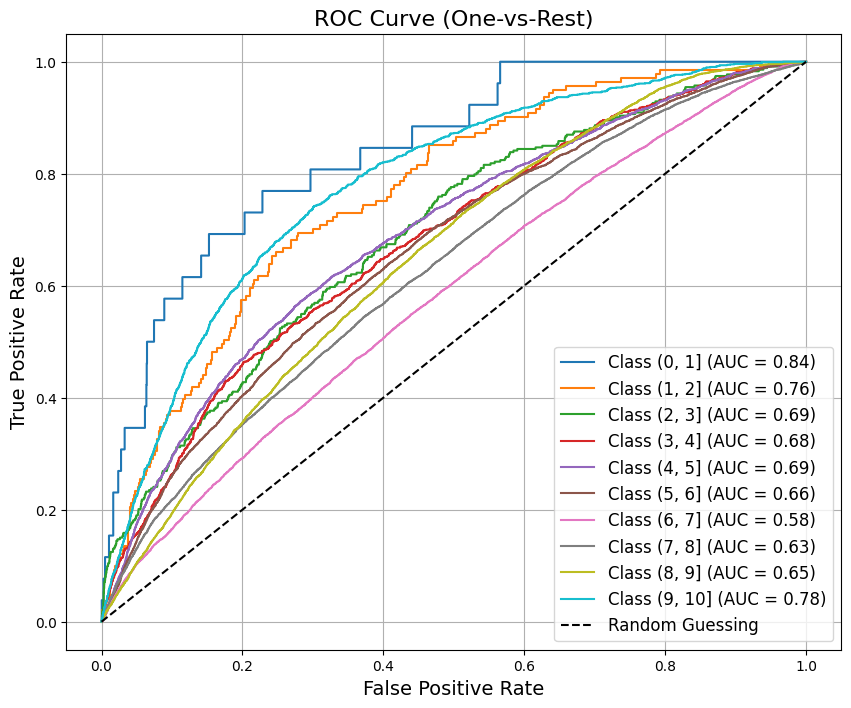

In [21]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve (One-vs-Rest)", fontsize = 16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()


In [22]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class="ovr", average="macro")

np.float64(0.6968468493792317)

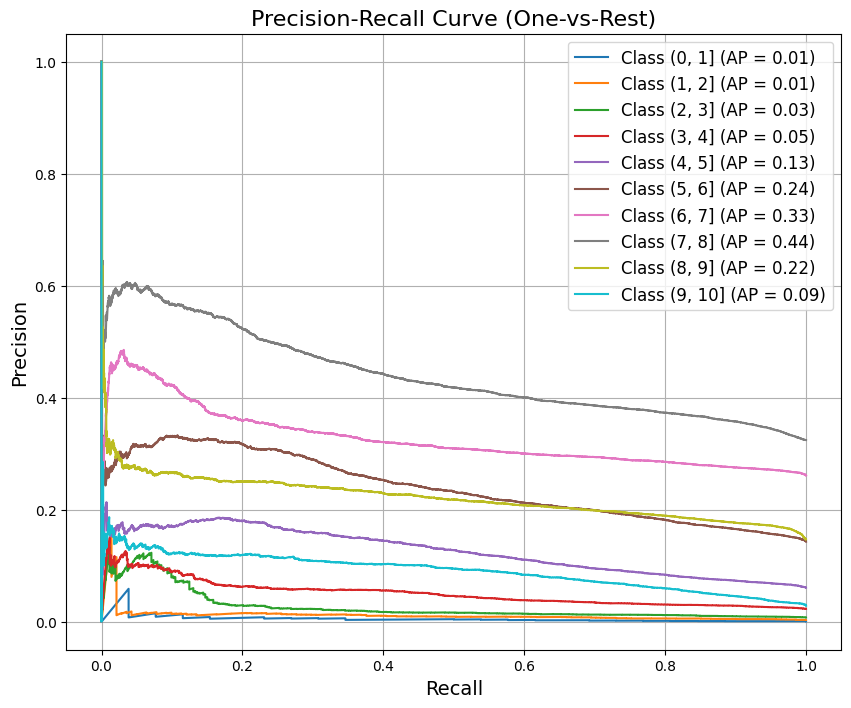

In [23]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()